In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
url1 = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"

df = pd.read_csv(url1)


In [31]:
df['Date']=pd.to_datetime(df['Date'])

In [32]:
df.columns

Index(['FlightNumber', 'Date', 'BoosterVersion', 'PayloadMass', 'Orbit',
       'LaunchSite', 'Outcome', 'Flights', 'GridFins', 'Reused', 'Legs',
       'LandingPad', 'Block', 'ReusedCount', 'Serial', 'Longitude', 'Latitude',
       'Class'],
      dtype='object')

In [33]:
df.dtypes

,0
FlightNumber,int64
Date,datetime64[ns]
BoosterVersion,object
PayloadMass,float64
Orbit,object
LaunchSite,object
Outcome,object
Flights,int64
GridFins,bool
Reused,bool


In [34]:
df.describe()

,FlightNumber,Date,PayloadMass,Flights,Block,ReusedCount,Longitude,Latitude,Class
count,90.000000,90,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000
mean,45.500000,2017-11-05 09:04:00,6104.959412,1.788889,3.500000,1.655556,-86.366477,29.449963,0.666667
min,1.000000,2010-06-04 00:00:00,350.000000,1.000000,1.000000,0.000000,-120.610829,28.561857,0.000000
25%,23.250000,2016-07-24 18:00:00,2510.750000,1.000000,2.000000,0.000000,-80.603956,28.561857,0.000000
50%,45.500000,2018-02-17 00:00:00,4701.500000,1.000000,4.000000,1.000000,-80.577366,28.561857,1.000000
75%,67.750000,2019-08-03 00:00:00,8912.750000,2.000000,5.000000,3.000000,-80.577366,28.608058,1.000000
max,90.000000,2020-11-05 00:00:00,15600.000000,6.000000,5.000000,5.000000,-80.577366,34.632093,1.000000
std,26.124701,NaN,4694.671720,1.213172,1.595288,1.710254,14.149518,2.141306,0.474045


In [35]:
df.isnull().sum()

,0
FlightNumber,0
Date,0
BoosterVersion,0
PayloadMass,0
Orbit,0
LaunchSite,0
Outcome,0
Flights,0
GridFins,0
Reused,0


In [36]:
df['LandingPad']=df['LandingPad'].fillna(np.median)

In [40]:
for i in df.columns:
  print(i,"\n",df[i].value_counts())

FlightNumber 
 FlightNumber
1     1
68    1
66    1
65    1
64    1
     ..
29    1
28    1
27    1
26    1
90    1
Name: count, Length: 90, dtype: int64
Date 
 Date
2010-06-04    1
2019-08-06    1
2019-06-12    1
2019-05-24    1
2019-05-04    1
             ..
2017-03-30    1
2017-03-16    1
2017-02-19    1
2017-01-14    1
2020-11-05    1
Name: count, Length: 90, dtype: int64
BoosterVersion 
 BoosterVersion
Falcon 9    90
Name: count, dtype: int64
PayloadMass 
 PayloadMass
15400.000000    10
9600.000000      7
6104.959412      5
15600.000000     3
4230.000000      1
                ..
6070.000000      1
2708.000000      1
3669.000000      1
6761.000000      1
3681.000000      1
Name: count, Length: 69, dtype: int64
Orbit 
 Orbit
GTO      27
ISS      21
VLEO     14
PO        9
LEO       7
SSO       5
MEO       3
ES-L1     1
HEO       1
SO        1
GEO       1
Name: count, dtype: int64
LaunchSite 
 LaunchSite
CCAFS SLC 40    55
KSC LC 39A      22
VAFB SLC 4E     13
Name: count, dtype: i

# EDA

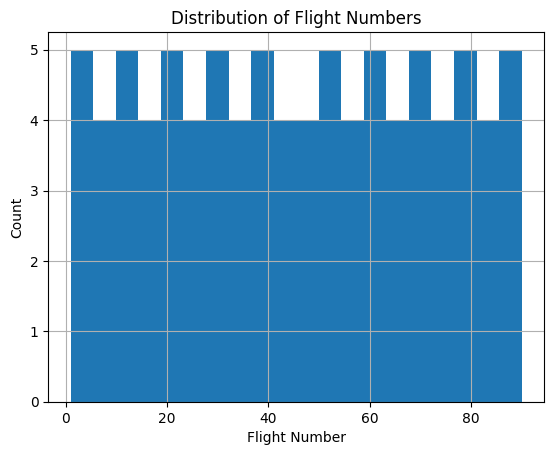

FlightNumber
1     1
68    1
66    1
65    1
64    1
     ..
29    1
28    1
27    1
26    1
90    1
Name: count, Length: 90, dtype: int64


In [41]:
# Histogram
df['FlightNumber'].hist(bins=20)
plt.title('Distribution of Flight Numbers')
plt.xlabel('Flight Number')
plt.ylabel('Count')
plt.show()

# Value counts
print(df['FlightNumber'].value_counts())


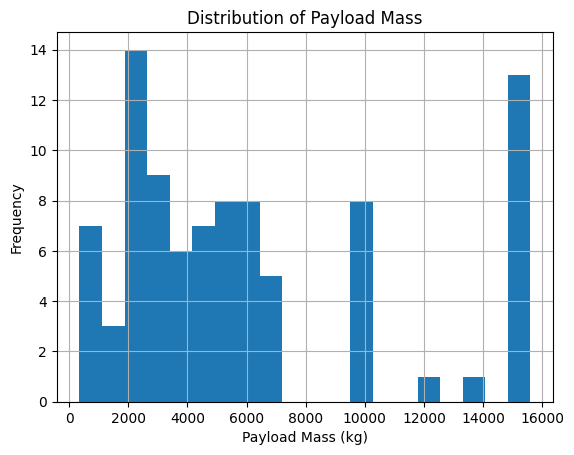

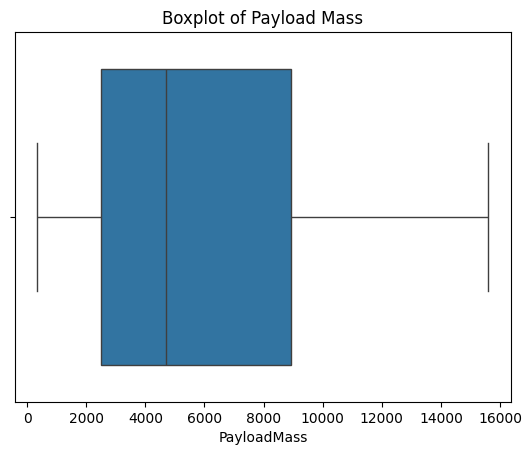

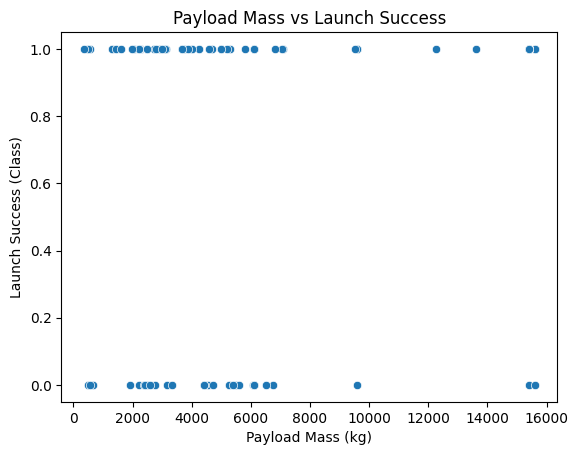

In [42]:
# Histogram
df['PayloadMass'].hist(bins=20)
plt.title('Distribution of Payload Mass')
plt.xlabel('Payload Mass (kg)')
plt.ylabel('Frequency')
plt.show()

# Boxplot
sns.boxplot(x=df['PayloadMass'])
plt.title('Boxplot of Payload Mass')
plt.show()

# Scatter plot: Payload Mass vs Class
sns.scatterplot(x='PayloadMass', y='Class', data=df)
plt.title('Payload Mass vs Launch Success')
plt.xlabel('Payload Mass (kg)')
plt.ylabel('Launch Success (Class)')
plt.show()


In [56]:
import folium
from IPython.display import display

# Create the map
launch_map = folium.Map(location=[df['Latitude'].mean(), df['Longitude'].mean()], zoom_start=4)

# Add markers for launch sites
for i, row in df.iterrows():
    folium.Marker(location=[row['Latitude'], row['Longitude']],
                  popup=row['LaunchSite']).add_to(launch_map)

# Display the map inline
launch_map


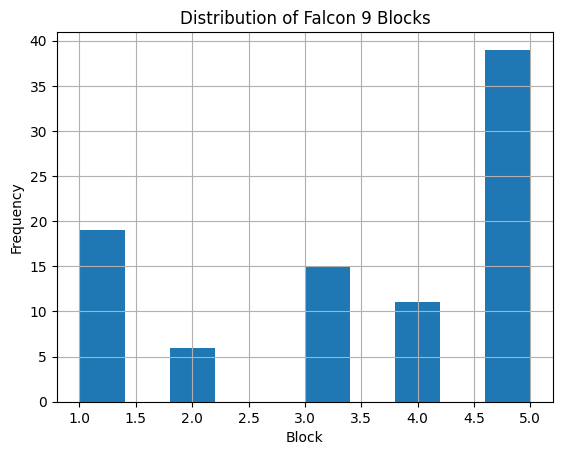

In [44]:
# Histogram
df['Block'].hist(bins=10)
plt.title('Distribution of Falcon 9 Blocks')
plt.xlabel('Block')
plt.ylabel('Frequency')
plt.show()


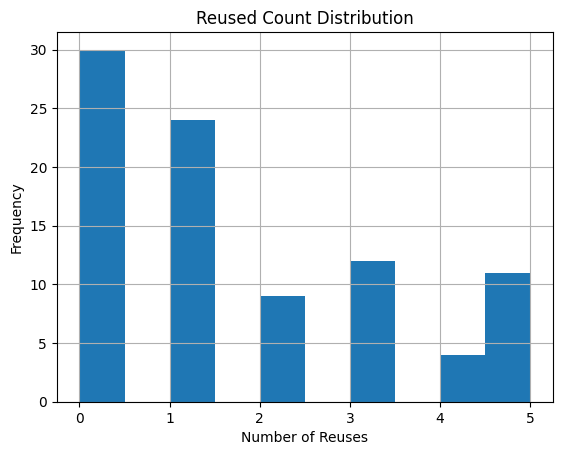

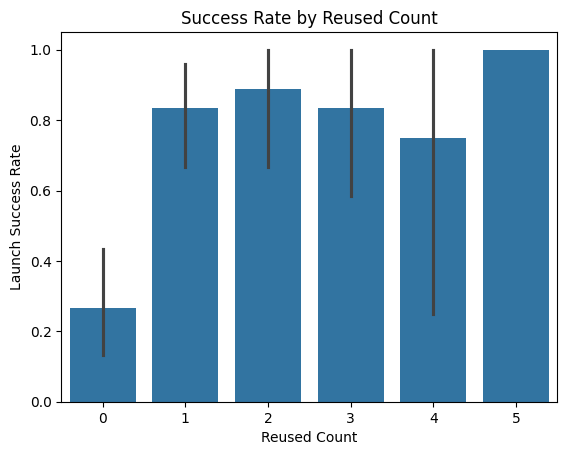

In [45]:
# Histogram
df['ReusedCount'].hist(bins=10)
plt.title('Reused Count Distribution')
plt.xlabel('Number of Reuses')
plt.ylabel('Frequency')
plt.show()

# Success vs Reused Count
sns.barplot(x='ReusedCount', y='Class', data=df)
plt.title('Success Rate by Reused Count')
plt.xlabel('Reused Count')
plt.ylabel('Launch Success Rate')
plt.show()


BoosterVersion
Falcon 9    90
Name: count, dtype: int64


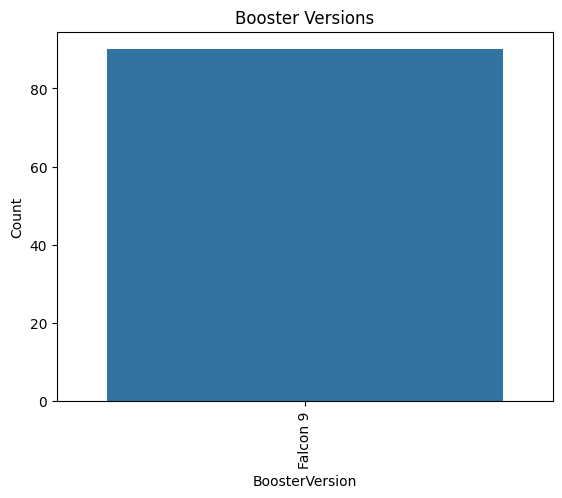

In [46]:
# Value counts
print(df['BoosterVersion'].value_counts())

# Bar plot
sns.countplot(x='BoosterVersion', data=df, order=df['BoosterVersion'].value_counts().index)
plt.title('Booster Versions')
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.show()


Orbit
GTO      27
ISS      21
VLEO     14
PO        9
LEO       7
SSO       5
MEO       3
ES-L1     1
HEO       1
SO        1
GEO       1
Name: count, dtype: int64


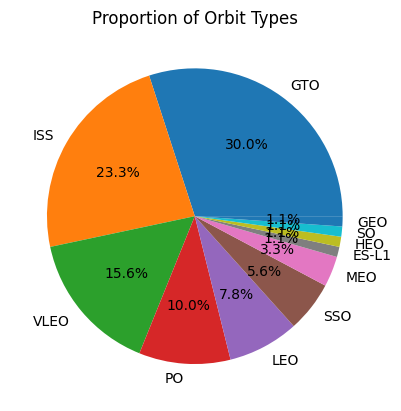

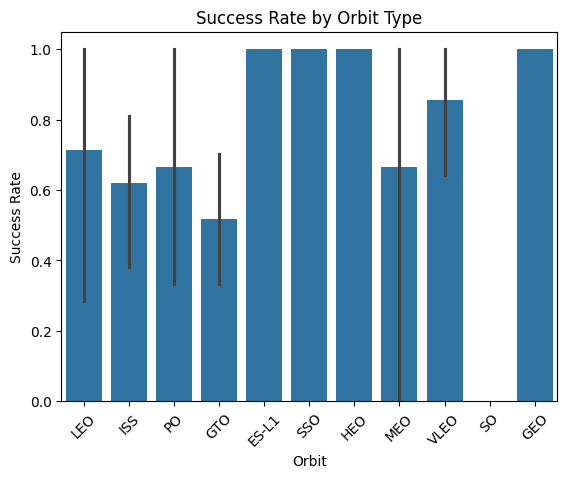

In [47]:
# Value counts
print(df['Orbit'].value_counts())

# Pie chart
df['Orbit'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Proportion of Orbit Types')
plt.ylabel('')
plt.show()

# Orbit vs Success Rate
sns.barplot(x='Orbit', y='Class', data=df)
plt.title('Success Rate by Orbit Type')
plt.xticks(rotation=45)
plt.ylabel('Success Rate')
plt.show()


LaunchSite
CCAFS SLC 40    55
KSC LC 39A      22
VAFB SLC 4E     13
Name: count, dtype: int64


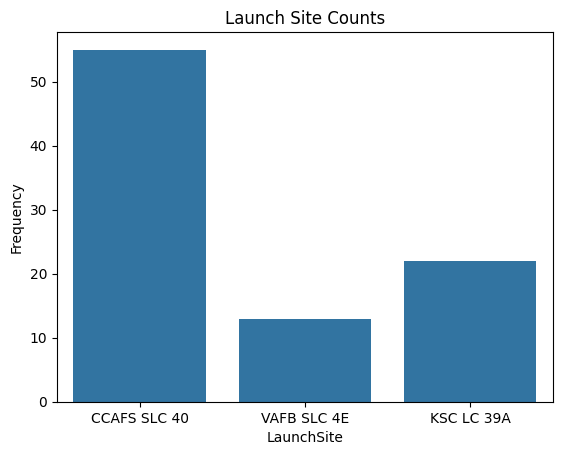

In [48]:
# Value counts
print(df['LaunchSite'].value_counts())

# Bar plot
sns.countplot(x='LaunchSite', data=df)
plt.title('Launch Site Counts')
plt.ylabel('Frequency')
plt.show()


Outcome
True ASDS      41
None None      19
True RTLS      14
False ASDS      6
True Ocean      5
False Ocean     2
None ASDS       2
False RTLS      1
Name: count, dtype: int64


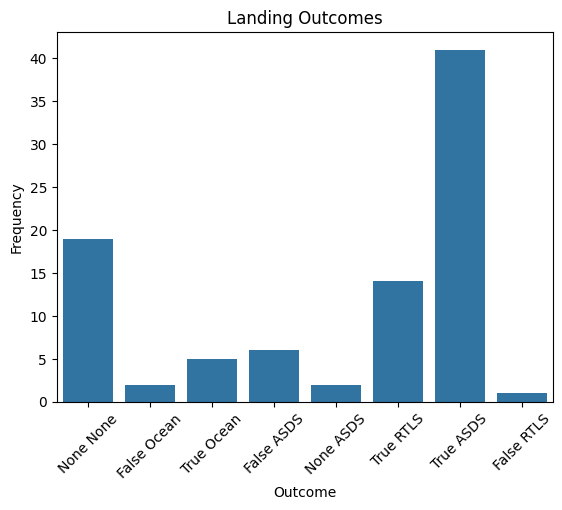

In [49]:
# Value counts
print(df['Outcome'].value_counts())

# Bar plot
sns.countplot(x='Outcome', data=df)
plt.title('Landing Outcomes')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()


LandingPad
5e9e3032383ecb6bb234e7ca               35
<function median at 0x7e45c7c24ca0>    26
5e9e3032383ecb267a34e7c7               13
5e9e3033383ecbb9e534e7cc               12
5e9e3032383ecb761634e7cb                2
5e9e3032383ecb554034e7c9                2
Name: count, dtype: int64


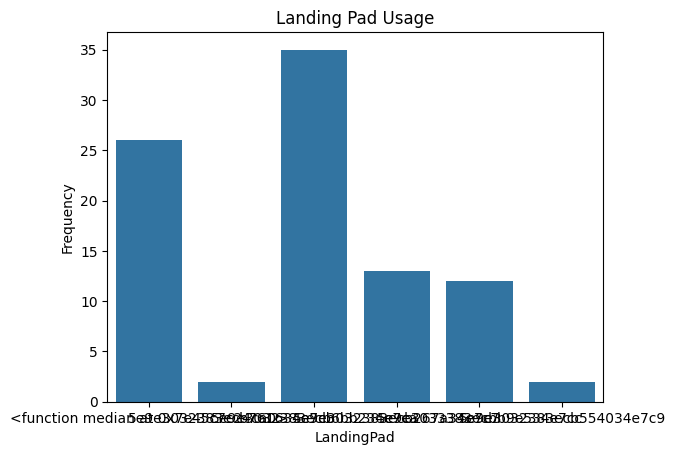

In [50]:
# Value counts
print(df['LandingPad'].value_counts())

# Bar plot
sns.countplot(x='LandingPad', data=df)
plt.title('Landing Pad Usage')
plt.ylabel('Frequency')
plt.show()


Serial
B1049    6
B1051    5
B1059    4
B1056    4
B1048    4
B1046    4
B1060    3
B1058    3
B1047    3
B1031    2
B1036    2
B1021    2
B1039    2
B1035    2
B1041    2
B1029    2
B1040    2
B1045    2
B1032    2
B1042    1
B1043    1
B1038    1
B1044    1
B1037    1
B1050    1
B1054    1
B1034    1
B0003    1
B1030    1
B1013    1
B0007    1
B1003    1
B1004    1
B1005    1
B1006    1
B1007    1
B1008    1
B1011    1
B1010    1
B1012    1
B1015    1
B0005    1
B1016    1
B1018    1
B1019    1
B1017    1
B1020    1
B1022    1
B1023    1
B1025    1
B1026    1
B1028    1
B1062    1
Name: count, dtype: int64


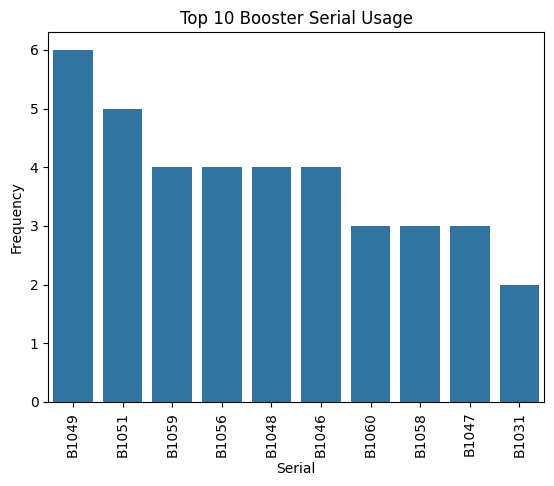

In [51]:
# Value counts
print(df['Serial'].value_counts())

# Bar plot
sns.countplot(x='Serial', data=df, order=df['Serial'].value_counts().index[:10])  # Show top 10
plt.title('Top 10 Booster Serial Usage')
plt.xticks(rotation=90)
plt.ylabel('Frequency')
plt.show()


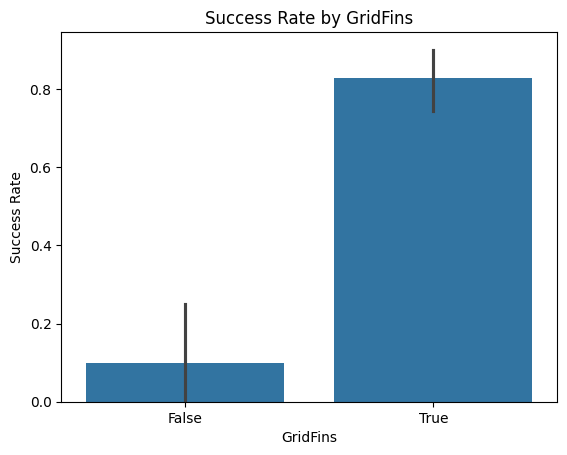

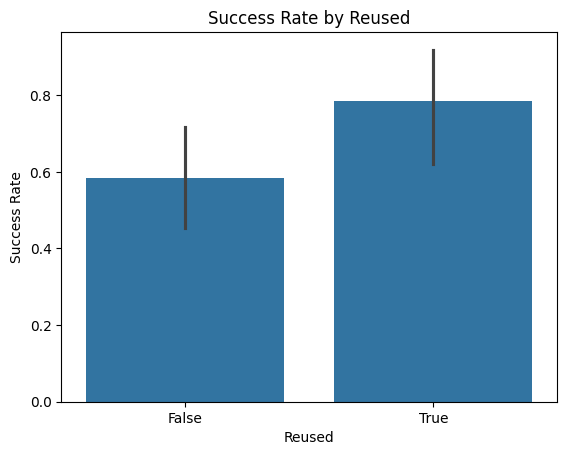

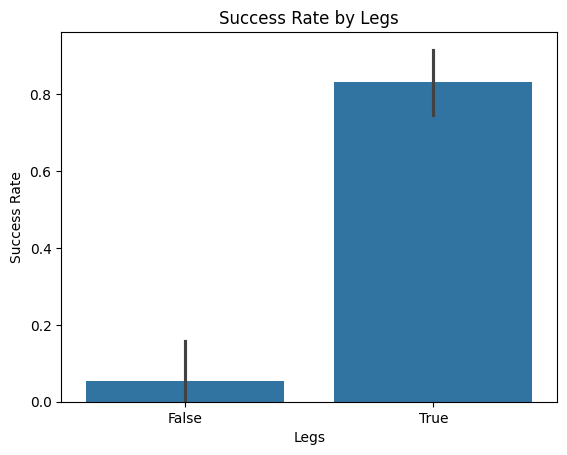

In [52]:
# Value counts and success rate
bool_columns = ['GridFins', 'Reused', 'Legs']

for col in bool_columns:
    sns.barplot(x=col, y='Class', data=df)
    plt.title(f'Success Rate by {col}')
    plt.ylabel('Success Rate')
    plt.show()


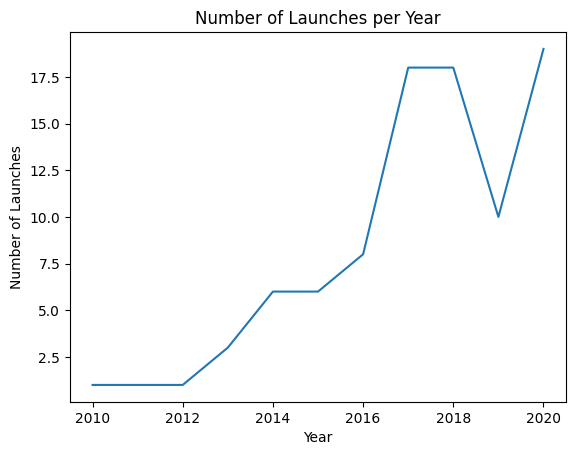

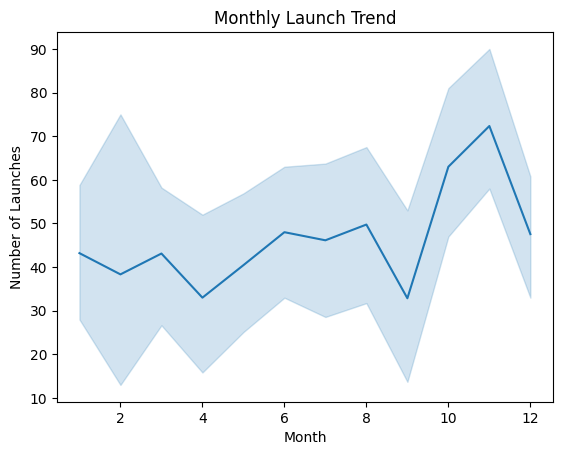

In [53]:
# Extract Year and Month
df['Year'] = pd.DatetimeIndex(df['Date']).year
df['Month'] = pd.DatetimeIndex(df['Date']).month

# Line plot of launches by year
launches_per_year = df.groupby('Year')['FlightNumber'].count()
launches_per_year.plot(kind='line')
plt.title('Number of Launches per Year')
plt.xlabel('Year')
plt.ylabel('Number of Launches')
plt.show()

# Monthly trend
sns.lineplot(x='Month', y='FlightNumber', data=df)
plt.title('Monthly Launch Trend')
plt.xlabel('Month')
plt.ylabel('Number of Launches')
plt.show()


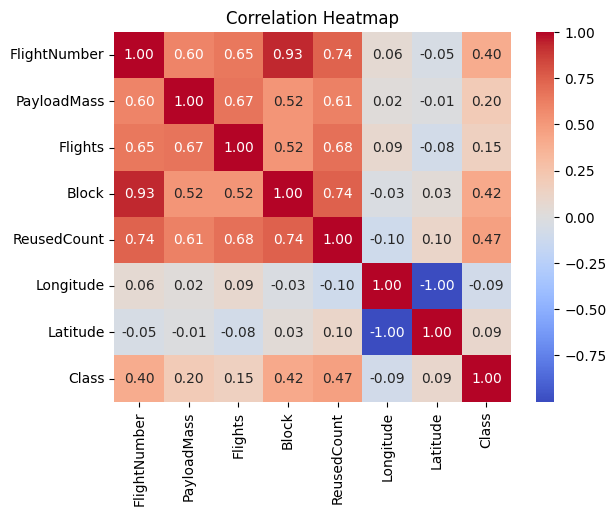

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns for correlation
numeric_cols = df.select_dtypes(include=['float64', 'int64'])  # Filter numeric columns
correlation_matrix = numeric_cols.corr()

# Plot the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


In [ ]:
df

# Predictive Analysis

In [69]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
import pandas as pd





# Dataset preprocessing
# Drop non-relevant columns
processed_df = df.drop(columns=['Date', 'LaunchSite', 'BoosterVersion', 'Serial', 'LandingPad'])

# Replace None or NaN values
processed_df = processed_df.fillna(0)

# Encode categorical columns
processed_df = pd.get_dummies(processed_df, columns=['Orbit'], drop_first=True)

# Convert boolean columns to integers
processed_df['GridFins'] = processed_df['GridFins'].astype(int)
processed_df['Reused'] = processed_df['Reused'].astype(int)
processed_df['Legs'] = processed_df['Legs'].astype(int)

# Mapping strings to numeric values
outcome_mapping = {
    "True ASDS": 1,
    "None None": 0,  # Assign a value like 0 for missing/unknown
    "True RTLS": 2,
    "False ASDS": 3,
    "True Ocean": 4,
    "False Ocean": 5,
    "None ASDS": 6,
    "False RTLS": 7,
}

# Apply mapping
processed_df['Outcome'] = processed_df['Outcome'].map(outcome_mapping)

# Ensure the column is numeric
processed_df['Outcome'] = processed_df['Outcome'].astype(float)


# Separate features and target
X = processed_df.drop('Class', axis=1)
y = processed_df['Class']

# Scale the features BEFORE splitting
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [70]:

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)
print("Logistic Regression Results:")
print(classification_report(y_test, y_pred_log))

# Decision Tree
tree_clf = DecisionTreeClassifier(max_depth=5, random_state=42)
tree_clf.fit(X_train, y_train)
y_pred_tree = tree_clf.predict(X_test)
print("Decision Tree Results:")
print(classification_report(y_test, y_pred_tree))

# Support Vector Machine
svc_clf = SVC(kernel='linear', random_state=42)
svc_clf.fit(X_train, y_train)
y_pred_svc = svc_clf.predict(X_test)
print("SVM Results:")
print(classification_report(y_test, y_pred_svc))

# Create a summary table
models = ['Logistic Regression', 'Decision Tree', 'SVM']
accuracy = [accuracy_score(y_test, y_pred_log),
            accuracy_score(y_test, y_pred_tree),
            accuracy_score(y_test, y_pred_svc)]

summary_table = pd.DataFrame({
    'Model': models,
    'Accuracy': accuracy
})

print(summary_table)


Logistic Regression Results:
              precision    recall  f1-score   support

           0       0.57      1.00      0.73         4
           1       1.00      0.79      0.88        14

    accuracy                           0.83        18
   macro avg       0.79      0.89      0.80        18
weighted avg       0.90      0.83      0.85        18

Decision Tree Results:
              precision    recall  f1-score   support

           0       0.67      1.00      0.80         4
           1       1.00      0.86      0.92        14

    accuracy                           0.89        18
   macro avg       0.83      0.93      0.86        18
weighted avg       0.93      0.89      0.90        18

SVM Results:
              precision    recall  f1-score   support

           0       0.57      1.00      0.73         4
           1       1.00      0.79      0.88        14

    accuracy                           0.83        18
   macro avg       0.79      0.89      0.80        18
weighted 

### Key Findings:

SpaceX's launch success rates have significantly improved over time.
Factors such as payload mass, orbit type, and landing pad play critical roles in determining mission outcomes.
The most frequently used launch site is CCAFS SLC-40.
Recommendations:

Optimize operations at launch sites with higher success rates.
Continue refining reusable technology (RTLS and ASDS) for cost reduction.
Future Work:

Integrate additional datasets to explore economic benefits.
Use advanced machine learning techniques for further predictive accuracy.